In [17]:
#Import dependencies
import csv
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from config import api_key
from pprint import pprint
from citipy import citipy

#Base URL for openweathermap api
url = "http://api.openweathermap.org/data/2.5/find?q="

#Output CSV
# Output File (CSV)
output_data_file = "Resources/output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

621


## Perform API calls on each city
>- Perform weather check on each city
>- Print each city as it's being processed. City name and number

In [18]:
n = 1                                      # City number counter
print('Beginning Data Retrieval\n---------------------------\n')
with open(output_data_file, mode='w', newline='') as output_file:
    
    weather_data_writer = csv.writer(output_file, dialect='excel')
    weather_data_writer.writerow(['City', 'Cloudiness', 'Humidity', 'Lat', 'Lon', 'Temperature', 'Wind Speed'])
    for city in cities:
        response = requests.get(f'{url}{city.title()}&units=imperial&APPID={api_key}')
        response_json = response.json()
                        
        if response_json['count'] != 0:
            print(f'Processing Record {n} of {len(cities)} | {response_json["list"][0]["name"]}')
            n += 1
            weather_data_writer.writerow([response_json['list'][0]['name'], \
                                           response_json['list'][0]['clouds']['all'], \
                                           response_json['list'][0]['main']['humidity'], \
                                           response_json['list'][0]['coord']['lat'], \
                                           response_json['list'][0]['coord']['lon'], \
                                           response_json['list'][0]['main']['temp'], \
                                           response_json['list'][0]['wind']['speed']])
        else:
            print('City not found. Skipping...')
                      
    print(f'---------------------------\nData Retrieval Complete {n - 1} cities total\n---------------------------')

Beginning Data Retrieval
---------------------------

Processing Record 1 of 621 | Iqaluit
Processing Record 2 of 621 | Kapaa
Processing Record 3 of 621 | Fort Nelson
Processing Record 4 of 621 | Ponta do Sol
City not found. Skipping...
Processing Record 5 of 621 | Rikitea
City not found. Skipping...
Processing Record 6 of 621 | Pevek
Processing Record 7 of 621 | Talaya
Processing Record 8 of 621 | Busselton
Processing Record 9 of 621 | Jamestown
Processing Record 10 of 621 | Hobart
Processing Record 11 of 621 | Kaitangata
Processing Record 12 of 621 | Centerville
Processing Record 13 of 621 | Thompson
Processing Record 14 of 621 | Lebu
Processing Record 15 of 621 | Punta Arenas
Processing Record 16 of 621 | Maryborough
Processing Record 17 of 621 | Sabla
Processing Record 18 of 621 | Pyshchug
Processing Record 19 of 621 | Turayf
Processing Record 20 of 621 | Marsa Matruh
City not found. Skipping...
Processing Record 21 of 621 | Hilo
Processing Record 22 of 621 | Grindavik
Processing R

Processing Record 191 of 621 | Guilin
Processing Record 192 of 621 | Mogapi
Processing Record 193 of 621 | Namatanai
Processing Record 194 of 621 | Arraial do Cabo
Processing Record 195 of 621 | Buenos Aires
Processing Record 196 of 621 | Longyearbyen
Processing Record 197 of 621 | Tongzi
City not found. Skipping...
Processing Record 198 of 621 | Cairns
Processing Record 199 of 621 | Yellandu
Processing Record 200 of 621 | Upernavik
Processing Record 201 of 621 | Lavrentiya
Processing Record 202 of 621 | Castro
Processing Record 203 of 621 | Wad Rawah
City not found. Skipping...
Processing Record 204 of 621 | Tyrma
Processing Record 205 of 621 | Rocha
Processing Record 206 of 621 | Nha Trang
Processing Record 207 of 621 | Hare Bay
Processing Record 208 of 621 | Saint George
Processing Record 209 of 621 | Fergus Falls
Processing Record 210 of 621 | Lakes Entrance
City not found. Skipping...
Processing Record 211 of 621 | Vanavara
Processing Record 212 of 621 | Beloha
Processing Record 2

Processing Record 371 of 621 | Malko Tarnovo
Processing Record 372 of 621 | Rumuruti
Processing Record 373 of 621 | Male
Processing Record 374 of 621 | Morant Bay
Processing Record 375 of 621 | Stephenville
City not found. Skipping...
Processing Record 376 of 621 | Chokurdakh
City not found. Skipping...
Processing Record 377 of 621 | Saint-Louis
Processing Record 378 of 621 | Pitimbu
Processing Record 379 of 621 | Chihuahua
Processing Record 380 of 621 | Namibe
Processing Record 381 of 621 | Gravdal
Processing Record 382 of 621 | Kanniyakumari
Processing Record 383 of 621 | Puro
Processing Record 384 of 621 | Lewisporte
Processing Record 385 of 621 | Caucasia
City not found. Skipping...
Processing Record 386 of 621 | Oranjemund
Processing Record 387 of 621 | Tarakan
Processing Record 388 of 621 | Christchurch
Processing Record 389 of 621 | Abu Dhabi
Processing Record 390 of 621 | Deputatskiy
Processing Record 391 of 621 | Mochudi
Processing Record 392 of 621 | Lethbridge
Processing Rec

## Convert Raw Data to DataFrame

In [19]:
weather_frame = pd.read_csv(output_data_file)
weather_frame.head()

,City,Cloudiness,Humidity,Lat,Lon,Temperature,Wind Speed
0,Iqaluit,75,85,63.7494,-68.5219,19.18,17.22
1,Kapaa,40,74,22.0752,-159.3190,76.23,11.41
2,Fort Nelson,90,64,58.8063,-122.6940,35.60,11.41
3,Ponta do Sol,100,94,-20.6335,-45.9989,66.44,2.80
4,Rikitea,100,85,-23.1203,-134.9692,72.56,13.94


## Temperature vs Latitude plot

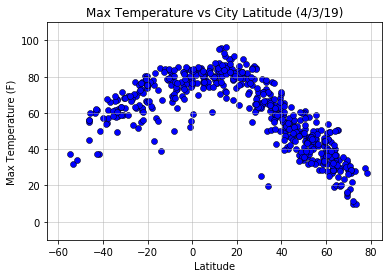

In [20]:
plt.scatter(weather_frame.Lat, weather_frame.Temperature, \
            marker='o', color='Blue', linewidths=0.5, edgecolors='black')

plt.title('Max Temperature vs City Latitude (4/3/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(fillstyle='bottom', alpha=0.6)
plt.ylim(top=110, bottom=-10)
plt.xlim(left=-65, right=85)

plt.savefig('Output_images/Max_temp_vs_city_latitude.jpeg', bbox_inches='tight')
plt.show()

## Humidity vs Latitude plot

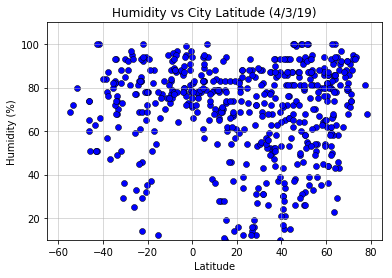

In [21]:
plt.scatter(weather_frame.Lat, weather_frame.Humidity, \
            marker='o', color='Blue', linewidths=0.5, edgecolors='black')

plt.title('Humidity vs City Latitude (4/3/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(fillstyle='full', alpha=0.6)
plt.ylim(top=110, bottom=10)
plt.xlim(left=-65, right=85)

plt.savefig('Output_images/Humidity_vs_city_latitude.jpeg', bbox_inches='tight')
plt.show()

## Cloudiness vs Latitude plot

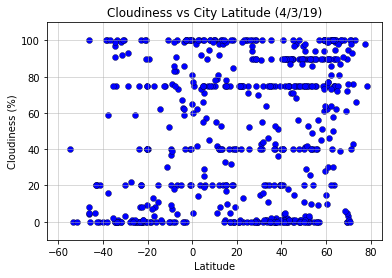

In [22]:
plt.scatter(weather_frame.Lat, weather_frame.Cloudiness, \
            marker='o', color='Blue', linewidths=0.3, edgecolors='black')

plt.title('Cloudiness vs City Latitude (4/3/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(fillstyle='full', alpha=0.6)
plt.ylim(top=110, bottom=-10)
plt.xlim(left=-65, right=85)

plt.savefig('Output_images/Cloudiness_vs_city_latitude.jpeg', bbox_inches='tight')
plt.show()

## Wind Speed vs Latitude plot

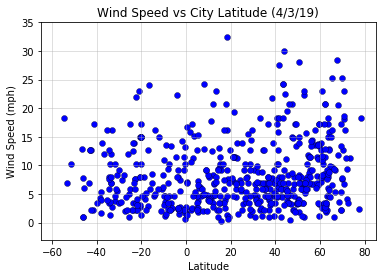

In [23]:
plt.scatter(weather_frame.Lat, weather_frame['Wind Speed'], \
            marker='o', color='Blue', linewidths=0.3, edgecolors='black')

plt.title('Wind Speed vs City Latitude (4/3/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(fillstyle='full', alpha=0.5)
plt.ylim(top=35, bottom=-3)
plt.xlim(left=-65, right=85)

plt.savefig('Output_images/Wind_speed_vs_city_latitude.jpeg', bbox_inches='tight')
plt.show()